# Wisconsin Breast Cancer Diagnostic

This project aims to build a machine learning model to determine if the tumor is benign or malignant. 

The dataset are obtained at the University of Wisconsin Hospitals and are stored by UCI Machine Learning Respository. 

The dataset contains information of 699 patients of Dr. Wolberg who diagnosed a tumor at their breast. The set of variables are features of the physical condition of the patients at around their tumors. 

1) Patient ID 
2) clump thickness (scale: 1 - 10)
3) Uniformity of Cell Size (scale: 1 - 10)
4) Uniformity of Cell Shape (scale: 1 - 10)
5) Marginal Adhesion (scale: 1 - 10)
6) Single Epithelial Cell Size  (scale: 1 - 10)
7) Bare Nuclei (scale: 1 - 10)
8) Bland Chromatin (scale: 1 - 10)
9) Normal Nucleoli (scale: 1 - 10)
10) Mitoses (scale: 1 - 10)
11) Class (2 for benign, 4 for malignant)

All the predictors are on sale of 1 to 10. The responese variable, Class, is a factor showing 2 for benign tumor and 4 for malignant tumor. Details can be read from the file "breast-cancer-wisconsin.names".

# Data cleaning

In [1]:
# read data
data <- read.csv(
    file = "breast-cancer-wisconsin.data",
    header = FALSE)

# first look at the names data
names(data)

[1] "V1"  "V2"  "V3"  "V4"  "V5"  "V6"  "V7"  "V8"  "V9"  "V10" "V11"

When I first looked at the data in Excel. The columns are all collapsed into one column. Luckily R regonized the pattern and separated the columns. 

First, the column names are missing. I have to first add it to the data:

In [2]:
# give variables name to the columns
colnames(data) <- c("id number", "clump_thickness", "cell_size", "cell_shape", "marginal_adhesion", "single_epithelial_cell_size", "bare_nuclei", "bland_chromatin", "normal_nucleoli", "mitoses", "class")

# first look at the data
str(data)

'data.frame':	699 obs. of  11 variables:
 $ id number                  : int  1000025 1002945 1015425 1016277 1017023 1017122 1018099 1018561 1033078 1033078 ...
 $ clump_thickness            : int  5 5 3 6 4 8 1 2 2 4 ...
 $ cell_size                  : int  1 4 1 8 1 10 1 1 1 2 ...
 $ cell_shape                 : int  1 4 1 8 1 10 1 2 1 1 ...
 $ marginal_adhesion          : int  1 5 1 1 3 8 1 1 1 1 ...
 $ single_epithelial_cell_size: int  2 7 2 3 2 7 2 2 2 2 ...
 $ bare_nuclei                : Factor w/ 11 levels "?","1","10","2",..: 2 3 4 6 2 3 3 2 2 2 ...
 $ bland_chromatin            : int  3 3 3 3 3 9 3 3 1 2 ...
 $ normal_nucleoli            : int  1 2 1 7 1 7 1 1 1 1 ...
 $ mitoses                    : int  1 1 1 1 1 1 1 1 5 1 ...
 $ class                      : int  2 2 2 2 2 4 2 2 2 2 ...


Notice that all the data types are integers except for bare_nuclei. bare_nuclei is a factor with 11 levels. Notice that there should only be 10 levels but there is an extra ? level. This is equivalent to a missing value but replaced with a question mark. I first check how many are there and if the amount is small, I will remove the rows.

In [3]:
# check data with question mark
qm.data <- data[data$bare_nuclei == "?", ]
dim(qm.data)

[1] 16 11

There are only 16 rows of them. Therefore, I will remove all of them:

In [4]:
# remove rows with missing data
data <- data[!data$bare_nuclei == "?", ]
dim(data)

[1] 683  11

Next, notice these data should be either ordinal or a factor. I will transform all of these into the right data type:

In [5]:
# clump_thickness to ordered
data$clump_thickness <- as.ordered(data$clump_thickness)

# cell_size to ordered
data$cell_size <- as.ordered(data$cell_size)

# cell_shape to ordered
data$cell_shape <- as.ordered(data$cell_shape)

# marg.adhesion to ordered
data$marginal_adhesion <- as.ordered(data$marginal_adhesion)

# single_epithelial_cell_size to ordered
data$single_epithelial_cell_size <- as.ordered(data$single_epithelial_cell_size)

# bland_chromatin to factor
data$bland_chromatin <- as.factor(data$bland_chromatin)

# normal_nucleoli to factor
data$normal_nucleoli <- as.factor(data$normal_nucleoli)

# mitoses
data$mitoses <- as.factor(data$mitoses)

# bare nuclei to factor
data$bare_nuclei <- as.factor(as.character(data$bare_nuclei))

# convert response column to factor (benign = 0, malignant = 1)
data$class <- data$class / 2 - 1
index <- (data$class == 0)
class <- c()
class[index] <- "benign"
class[!index] <- "mlignant"
class <- as.factor(class)
data$class <- class

str(data)

'data.frame':	683 obs. of  11 variables:
 $ id number                  : int  1000025 1002945 1015425 1016277 1017023 1017122 1018099 1018561 1033078 1033078 ...
 $ clump_thickness            : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 5 5 3 6 4 8 1 2 2 4 ...
 $ cell_size                  : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 1 4 1 8 1 10 1 1 1 2 ...
 $ cell_shape                 : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 1 4 1 8 1 10 1 2 1 1 ...
 $ marginal_adhesion          : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 1 5 1 1 3 8 1 1 1 1 ...
 $ single_epithelial_cell_size: Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 2 7 2 3 2 7 2 2 2 2 ...
 $ bare_nuclei                : Factor w/ 10 levels "1","10","2","3",..: 1 2 3 5 1 2 2 1 1 1 ...
 $ bland_chromatin            : Factor w/ 10 levels "1","2","3","4",..: 3 3 3 3 3 9 3 3 1 2 ...
 $ normal_nucleoli            : Factor w/ 10 levels "1","2","3","4",..: 1 2 1 7 1 7 1 1 1 1 ...
 $ mitoses                    : Factor w/ 9 lev

The data type looks right now. Next, notice that patient id number has no correlation with tumor type at all. I will remove this variable.

In [6]:
# remove id column
data <- data[,-1]

We are now ready to fo some exploratory data analysis.

# Exploratory data analysis

First, let have a boxplot of all the variables to see if there are outliners:

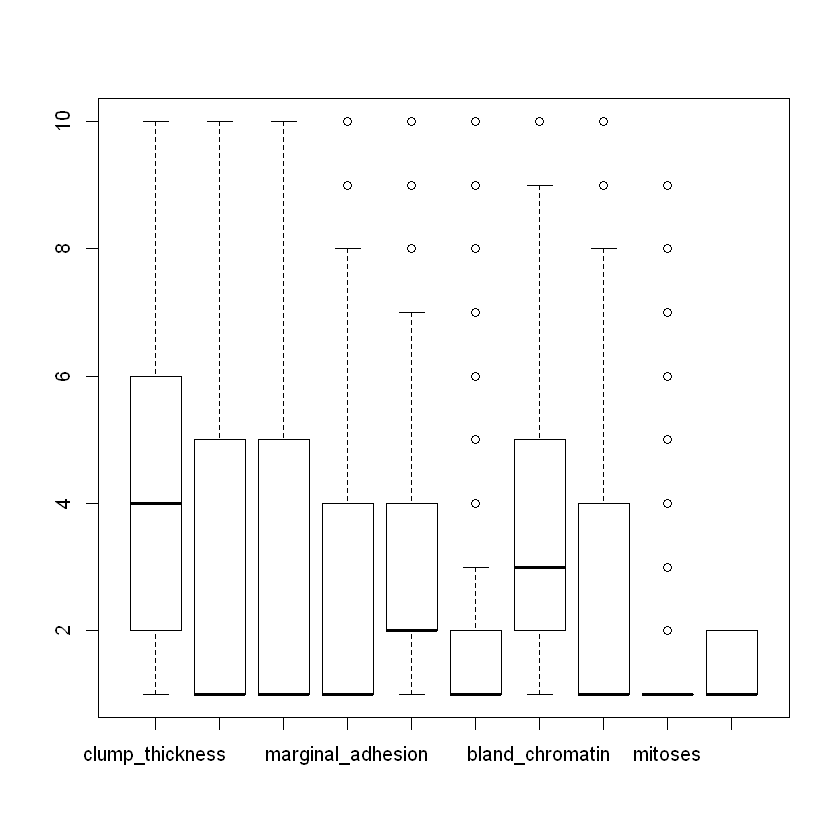

In [7]:
# boxplot
boxplot(data)

Looks like there are serverl variables with outliners, with mitoses being the one with largest number.

To better identify the presence of outlier, we will plot some histgrams of the variables.

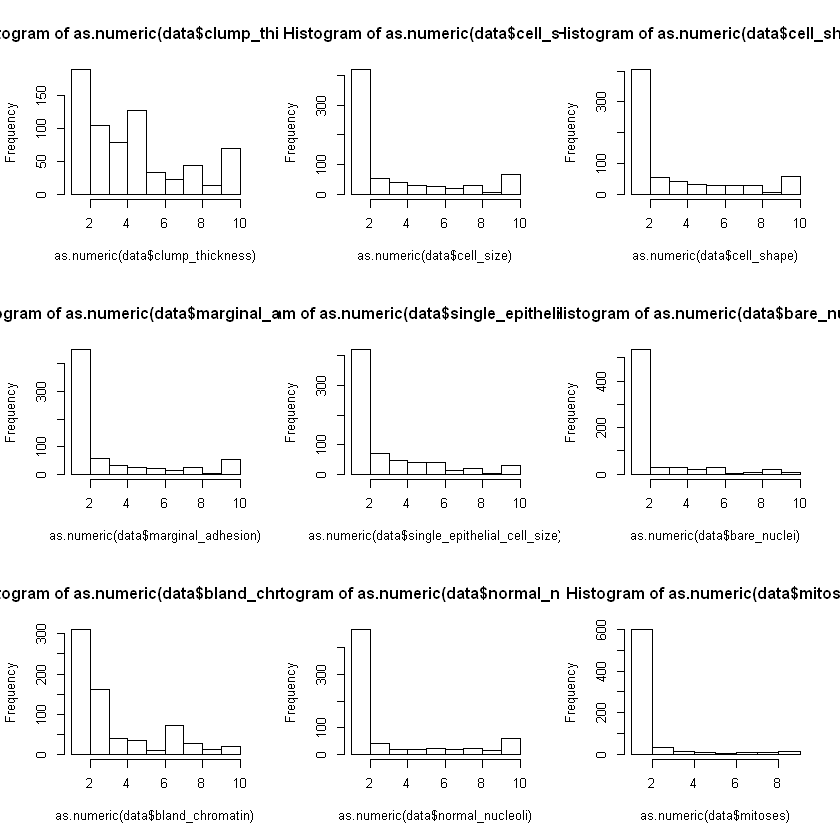

In [8]:
# histogram
par(mfrow=c(3, 3))
hist(as.numeric(data$clump_thickness))
hist(as.numeric(data$cell_size))
hist(as.numeric(data$cell_shape))
hist(as.numeric(data$marginal_adhesion))
hist(as.numeric(data$single_epithelial_cell_size))
hist(as.numeric(data$bare_nuclei))
hist(as.numeric(data$bland_chromatin))
hist(as.numeric(data$normal_nucleoli))
hist(as.numeric(data$mitoses))

From the histogram, we can see there are some outliers in variables mitoses and bare_nuclei.

Looks like everthing is fine now, we can start fitting a model.

# Model fitting

My approach is to fit a neural network with the first 9 variables as the input and the variable Class as the output. 

Notice all the predictors are on the same scale, however, from the boxplot, they don't have similar distribution. 

For neural networks, it is always good to standardize the variables so the training of weights are affected equally.  Therefore, I will standardize the predictors. 

In [9]:
# take only predictors and convert all to number
input <- as.data.frame(lapply(data[,1:9], function(x) as.numeric(x)))
                              
# standardize data
max_data <- apply(input, 2, max)
min_data <- apply(input, 2, min)
data_scaled <- scale(input,center = min_data, scale = max_data - min_data)

In this dataset, since we are trying to make classification, I will create a dummy variable for the output which contains 2 columns, with one being cancerbenign and one being cancermalignant.

If the entry of the original column is benign, then it shows 1 on the cancerbenign column and 0 on the cancermalignant, and vice versa.

Then I will add those to the scaled data.

In [10]:
# create dummy variables of response
cancer <- data$class
cancer <- as.data.frame(cancer)
cancer <- with(cancer, data.frame(model.matrix(~cancer+0)))
head(cancer)

# predictors + response
data_final <- as.data.frame(cbind(data_scaled, cancer))

cancerbenign,cancermlignant
1,0
1,0
1,0
1,0
1,0
0,1


The data is now ready for model training. I will first split the data randomly into a 70:30 ratio, with 70% training data and 30% testing data.

In [11]:
# split into training and testing data
index <- sample(1:nrow(data_final), round(0.7*nrow(data_final)))
data_training <- as.data.frame(data_final[index,])
data_testing <- as.data.frame(data_final[-index,])

The next codes are all the models, with f being the formula of the model. Recall call that for a simple question like the above, there is no need for 2 hidden layers (too complex). The general rule of thumb for number of neurons in the hidden layer between the number of inputs and number of outputs, or the mean of the two. That is, the number of neurons in the hidden layer should be between 3 to 10, with 5 (round off mean). I will first with 5 and see if we need to try more based on the predicted results.

In [12]:
# neural network library
library(neuralnet)

# formaul for network
n <- names(data_final[1:9])
f <- as.formula(paste("cancerbenign + cancermlignant ~", paste(n, collapse = " + ")))

f

# neuralnet model
net <- neuralnet(f, data = data_training, hidden = 5, linear.output = FALSE)

cancerbenign + cancermlignant ~ clump_thickness + cell_size + 
    cell_shape + marginal_adhesion + single_epithelial_cell_size + 
    bare_nuclei + bland_chromatin + normal_nucleoli + mitoses

There is a known bug when using R in Jupyter, where one cannot plot the neural net from package "neuralnet". I ran the exact same code in Rstudio in my computer and the following plot is produced.

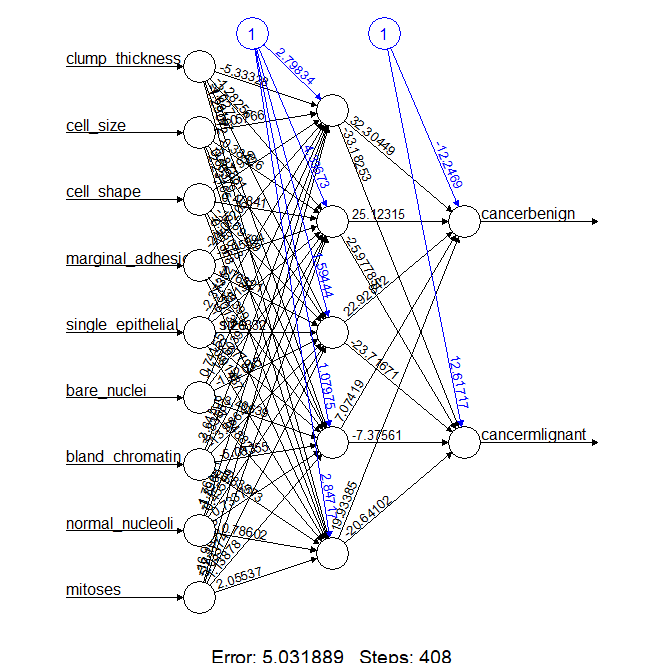

In [13]:
library("IRdisplay")
display_png(file="neuralnet.png") 

Next, we will put the testing data into the model and see how well it predicts the results.

In [14]:
# predict test response
pred_net_test <- compute(net, data_testing[, 1:9])

# switch test result to 0/1
pred_result <- round(pred_net_test$net.result)

# from dummy variables back to the original variable
pred_result <- c("benign", "malignant")[apply(pred_result, 1, which.max)]

# confusion matrix
(predict.table = table(data$class[-index], pred_result))

          pred_result
           benign malignant
  benign      137         3
  mlignant      3        62

In [15]:
# Accuracy
(137 + 62) / (137 + 62 + 3 + 3)

[1] 0.9707317

With the model, we have produced a $97\%$ accuracy prediction with the model, which is very good in my opinion. However, the most important one is the precentage of diagnosting malignant preciously. Therefore, what we truly care is 

\begin{equation}
\frac{\text{number of correct malignant diagnosted}}{\text{number of all malignant}} = \frac{\text{True positive}}{\text{All positive}} = \text{True positive rate}
\end{equation}

In [16]:
# True positive rate
62 / (62 + 3)

[1] 0.9538462

The True positive rate is $93\%$, which is pretty good "on paper". However, we can see that 7 patients has been wrongly diagnosted, which is not very good in my opinion. This means that for every 100 patients with malignant tumor, 7 patient will be diagnosted wrongly.

I think this is not ideal, and there should be better modelling for this type of medical problems. I will try fit a neural network with 3, 6, 9 neurons in the hidden layer.

In [31]:
# neuralnet model with 3 neurons
net3 <- neuralnet(f, data = data_training, hidden = 3, linear.output = FALSE)

# predict test response
pred_net_test <- compute(net3, data_testing[, 1:9])

# switch test result to 0/1
pred_result <- round(pred_net_test$net.result)

# from dummy variables back to the original variable
pred_result <- c("benign", "malignant")[apply(pred_result, 1, which.max)]

# confusion matrix
(predict.table = table(data$class[-index], pred_result))

          pred_result
           benign malignant
  benign      138         2
  mlignant      2        63

In [32]:
# neuralnet model with 6 neurons
net6 <- neuralnet(f, data = data_training, hidden = 3, linear.output = FALSE)

# predict test response
pred_net_test <- compute(net6, data_testing[, 1:9])

# switch test result to 0/1
pred_result <- round(pred_net_test$net.result)

# from dummy variables back to the original variable
pred_result <- c("benign", "malignant")[apply(pred_result, 1, which.max)]

# confusion matrix
(predict.table = table(data$class[-index], pred_result))

          pred_result
           benign malignant
  benign      137         3
  mlignant      3        62

In [33]:
# neuralnet model with 9 neurons
net9 <- neuralnet(f, data = data_training, hidden = 3, linear.output = FALSE)

# predict test response
pred_net_test <- compute(net9, data_testing[, 1:9])

# switch test result to 0/1
pred_result <- round(pred_net_test$net.result)

# from dummy variables back to the original variable
pred_result <- c("benign", "malignant")[apply(pred_result, 1, which.max)]

# confusion matrix
(predict.table = table(data$class[-index], pred_result))

          pred_result
           benign malignant
  benign      136         4
  mlignant      3        62

Here we can see that with 6 and 9 neurons, the results are actually worse. With 3 neurons, we are having the best results. Lets calculate the accuracy and True positive rate:

In [35]:
# Accuracy
(138 + 63) / (138 + 63 + 2 + 2)

# True positive rate
63 / (63 + 2)

[1] 0.9804878

[1] 0.9692308

With the new model, we have boosted our accuracy to $98\%$ and our True positive rate to $97\%$. This means that for 100 patients with malignant tumor, only 3 patients is wrongly diagnosted, which is an excellent result!